#### KNN Model
n = 7
  
Accuracy = 55%

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../Data/combind_sen_stock.csv")
df.head()


,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Label,Tweets_clean_more,polarity,subjectivity,sentiment,half_H_L
0,0,2011-12-01,2.171333,2.266000,2.132000,2.173333,2.173333,15453000,Increase,i made volum model s go now i need work miniat...,0.300000,0.200000,positive,1.200000
1,1,2011-12-21,1.860667,1.871333,1.735333,1.838000,1.838000,25582500,Decrease,yeah realli mom attest not sure i handl char m...,0.377273,0.708687,positive,1.003667
2,2,2011-12-22,1.840000,1.870000,1.820000,1.851333,1.851333,15141000,Increase,model s option perform red black i deliv car j...,0.090476,0.376190,positive,0.960000
3,3,2011-12-28,1.932667,1.949333,1.869333,1.900667,1.900667,8628000,Decrease,if ever want know real truth moon land best on...,0.600000,0.300000,positive,1.014666
4,4,2011-12-29,1.906000,1.956000,1.903333,1.915333,1.915333,7323000,Increase,cool person essay it realli reson i felt way c...,0.132857,0.438571,positive,1.004333


In [4]:
df = df[["Date","sentiment","Volume","subjectivity","polarity","Adj Close","Label"]]
df = df.replace({'positive':1,'negative':-1,'neutral':0,'Increase':1,'Decrease':-1,'No Change':0})
df.set_index("Date",inplace= True)
df.head()

,sentiment,Volume,subjectivity,polarity,Adj Close,Label
Date,,,,,,
2011-12-01,1,15453000,0.200000,0.300000,2.173333,1
2011-12-21,1,25582500,0.708687,0.377273,1.838000,-1
2011-12-22,1,15141000,0.376190,0.090476,1.851333,1
2011-12-28,1,8628000,0.300000,0.600000,1.900667,-1
2011-12-29,1,7323000,0.438571,0.132857,1.915333,1


In [5]:
x = df.drop(columns = "Label")
y = df["Label"]
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8, random_state=123)

Model report: n =  1
Accuracy score:  0.47368421052631576


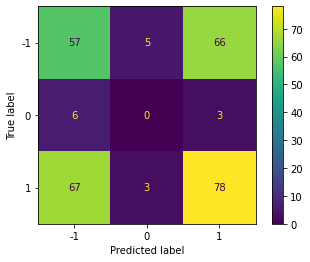



Model report: n =  3
Accuracy score:  0.5087719298245614


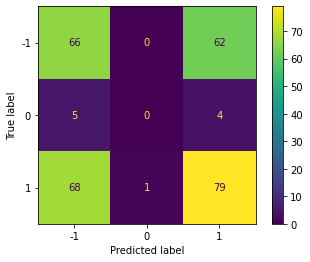



Model report: n =  5
Accuracy score:  0.5228070175438596


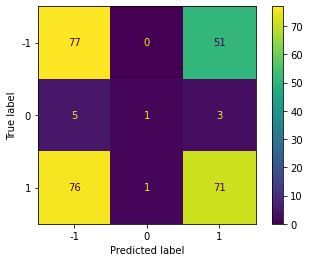



Model report: n =  7
Accuracy score:  0.5473684210526316


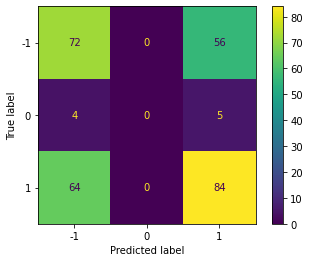



Model report: n =  9
Accuracy score:  0.519298245614035


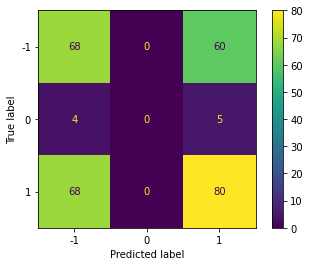



Model report: n =  11
Accuracy score:  0.49473684210526314


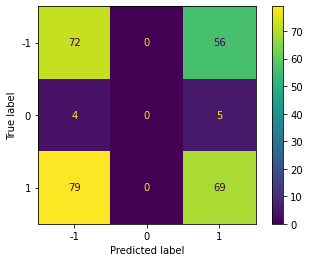



Model report: n =  13
Accuracy score:  0.519298245614035


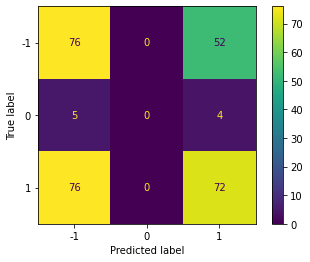



Model report: n =  15
Accuracy score:  0.5052631578947369


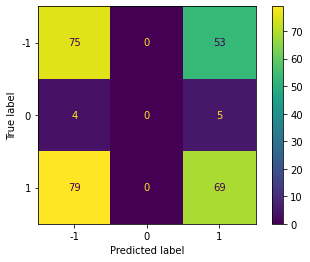



Model report: n =  17
Accuracy score:  0.512280701754386


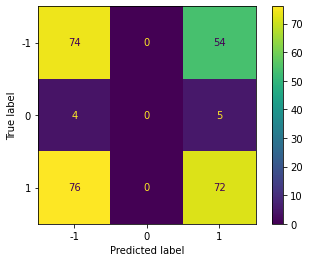



Model report: n =  19
Accuracy score:  0.5017543859649123


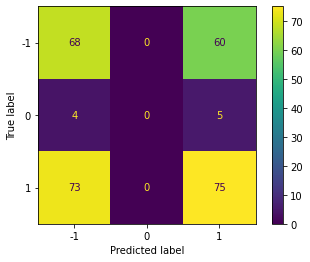



Model report: n =  21
Accuracy score:  0.512280701754386


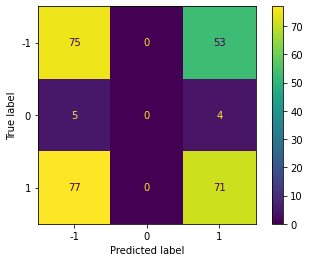

In [6]:
neighbors =[i for i in range(1,22,2)]
for n in neighbors:
    clf = KNeighborsClassifier(n_neighbors=n,p=1) # manhattan distance
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    cm = confusion_matrix(y_test,y_pred)
    acc = accuracy_score(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
    print("Model report: n = ",n)
    print("Accuracy score: ",acc)
    disp.plot()
    plt.show()
    print("\n")


Model report: n =  1
Accuracy score:  0.47368421052631576


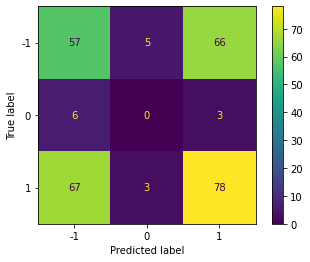



Model report: n =  3
Accuracy score:  0.5087719298245614


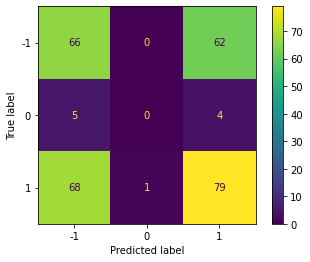



Model report: n =  5
Accuracy score:  0.5228070175438596


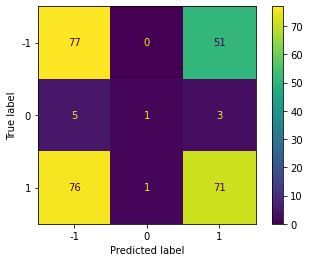



Model report: n =  7
Accuracy score:  0.5473684210526316


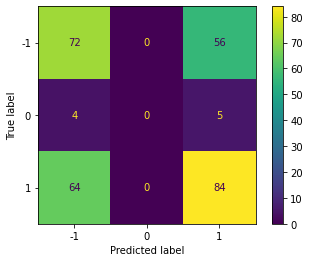



Model report: n =  9
Accuracy score:  0.519298245614035


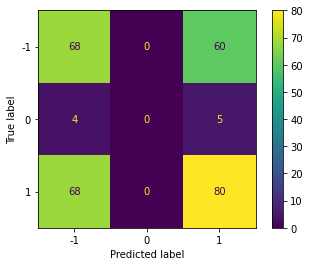



Model report: n =  11
Accuracy score:  0.49473684210526314


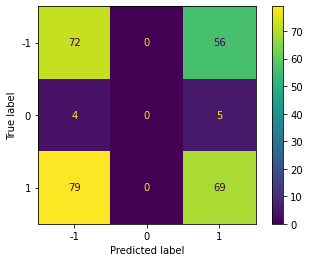



Model report: n =  13
Accuracy score:  0.519298245614035


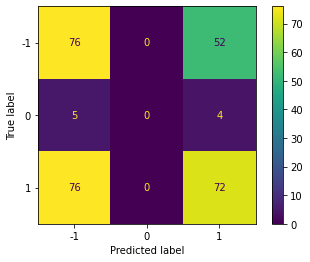



Model report: n =  15
Accuracy score:  0.5052631578947369


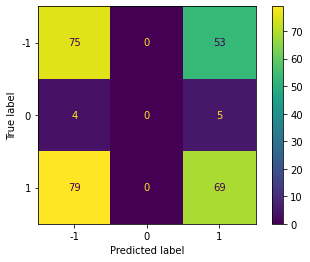



Model report: n =  17
Accuracy score:  0.512280701754386


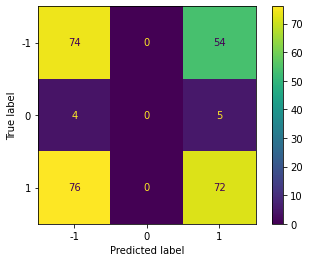



Model report: n =  19
Accuracy score:  0.5017543859649123


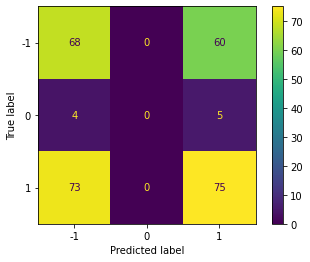



Model report: n =  21
Accuracy score:  0.512280701754386


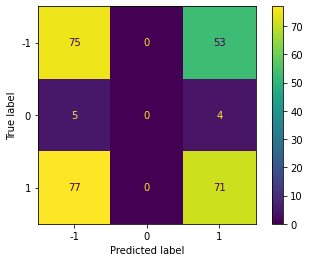

In [8]:
neighbors =[i for i in range(1,22,2)]
for n in neighbors:
    clf = KNeighborsClassifier(n_neighbors=n,p=2) #euclidean distance
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    cm = confusion_matrix(y_test,y_pred)
    acc = accuracy_score(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
    print("Model report: n = ",n)
    print("Accuracy score: ",acc)
    disp.plot()
    plt.show()
    print("\n")

In [9]:
df2 = pd.read_csv("../Data/Combined_Delayed_2Days.csv")
df2 = df2[["Date","sentiment","subjectivity","polarity","Label_delayed_2Days"]]
df2 = df2.replace({'positive':1,'negative':-1,'neutral':0,'Increase':1,'Decrease':-1,'No Change':0})
df2.set_index("Date",inplace= True)
df2.head()

,sentiment,subjectivity,polarity,Label_delayed_2Days
Date,,,,
2013-01-10,1,0.525000,0.216667,-1
2019-01-10,1,0.490556,0.123333,1
2020-01-10,1,0.570988,0.411111,-1
2012-01-11,1,1.000000,0.600000,-1
2016-01-11,-1,1.000000,-0.500000,1


Model report: n =  1
Accuracy score:  0.5035211267605634


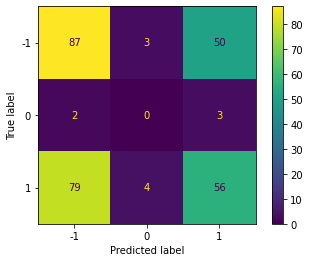



Model report: n =  3
Accuracy score:  0.4894366197183099


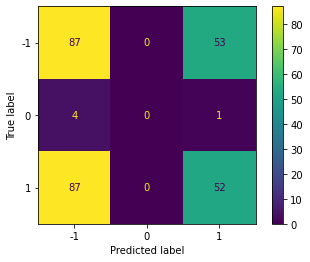



Model report: n =  5
Accuracy score:  0.5


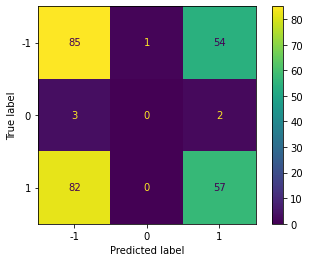



Model report: n =  7
Accuracy score:  0.5070422535211268


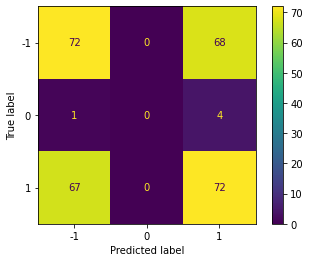



Model report: n =  9
Accuracy score:  0.5246478873239436


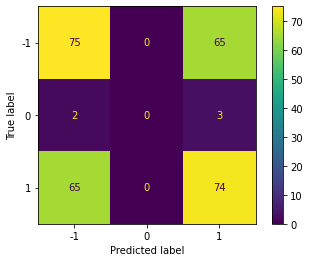



Model report: n =  11
Accuracy score:  0.5246478873239436


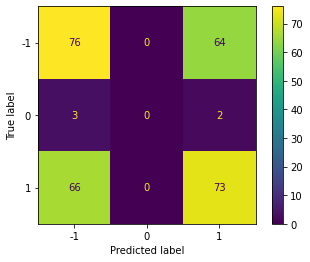



Model report: n =  13
Accuracy score:  0.5176056338028169


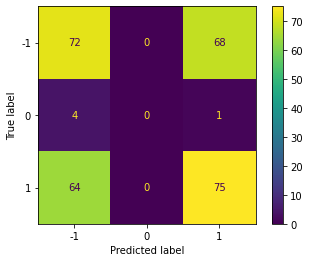



Model report: n =  15
Accuracy score:  0.4753521126760563


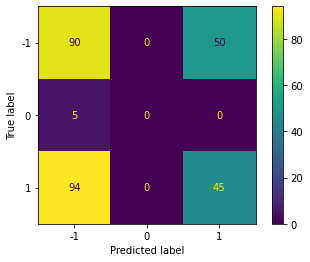



Model report: n =  17
Accuracy score:  0.4894366197183099


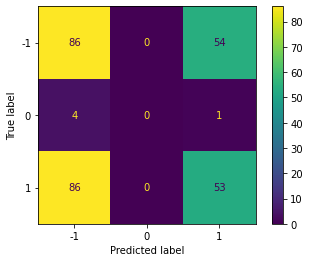



Model report: n =  19
Accuracy score:  0.5246478873239436


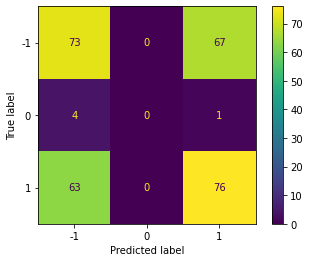



Model report: n =  21
Accuracy score:  0.5316901408450704


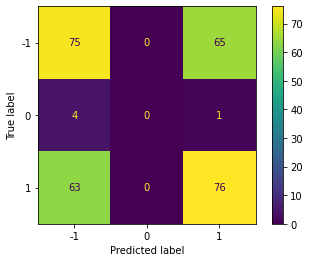

In [12]:
x2 = df2[["sentiment","subjectivity","polarity"]]
y2 = df2['Label_delayed_2Days']

x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2,train_size = 0.8, random_state=123)

neighbors =[i for i in range(1,22,2)] #1,3,5,7,9,...

for n in neighbors:
    clf2 = KNeighborsClassifier(n_neighbors=n,p=1) # manhattan distance
    clf2.fit(x_train2,y_train2)
    y_pred2 = clf2.predict(x_test2)
    cm = confusion_matrix(y_test2,y_pred2)
    acc = accuracy_score(y_test2,y_pred2)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf2.classes_)
    print("Model report: n = ",n)
    print("Accuracy score: ",acc)
    disp.plot()
    plt.show()
    print("\n")


Model report: n =  1
Accuracy score:  0.5


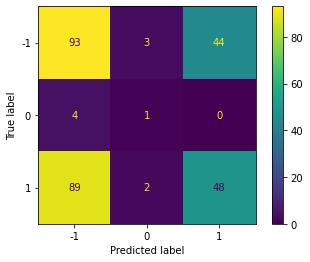



Model report: n =  3
Accuracy score:  0.49295774647887325


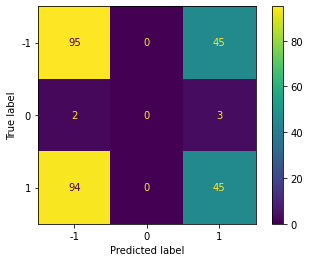



Model report: n =  5
Accuracy score:  0.4612676056338028


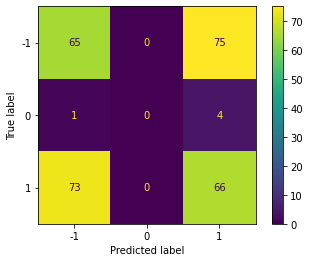



Model report: n =  7
Accuracy score:  0.45422535211267606


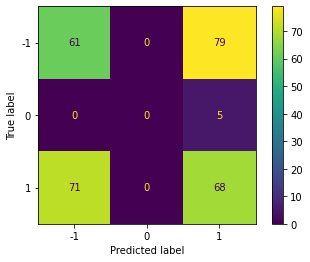



Model report: n =  9
Accuracy score:  0.5246478873239436


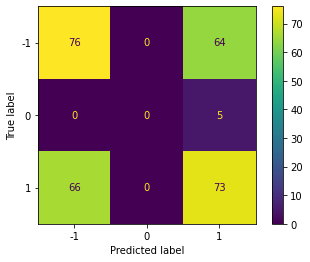



Model report: n =  11
Accuracy score:  0.5070422535211268


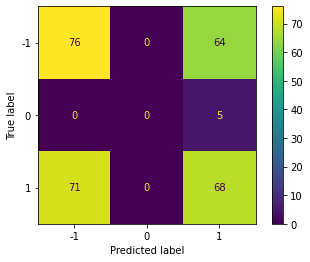



Model report: n =  13
Accuracy score:  0.5070422535211268


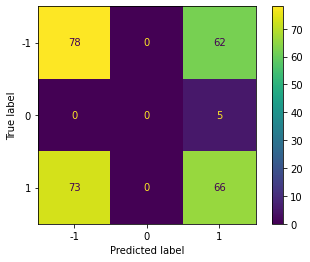



Model report: n =  15
Accuracy score:  0.5105633802816901


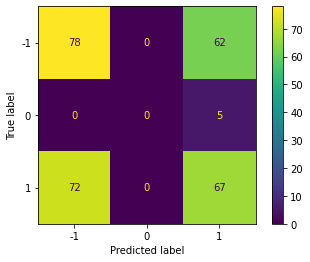

In [14]:
x3 = df2[["sentiment","polarity"]]
y3 = df2['Label_delayed_2Days']

x_train3,x_test3,y_train3,y_test3 = train_test_split(x3,y3,train_size = 0.8, random_state=123)

neighbors =[i for i in range(1,16,2)] #1,3,5,7,9,...

for n in neighbors:
    clf3 = KNeighborsClassifier(n_neighbors=n,p=1) # manhattan distance
    clf3.fit(x_train3,y_train3)
    y_pred3 = clf3.predict(x_test3)
    cm = confusion_matrix(y_test3,y_pred3)
    acc = accuracy_score(y_test3,y_pred3)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf3.classes_)
    print("Model report: n = ",n)
    print("Accuracy score: ",acc)
    disp.plot()
    plt.show()
    print("\n")